### Marketing Budget and Actual Sales Dataset

Dataset about Markting Budget in Thousands and Actual Sales in Millions. This dataset can be process using linear regression methods to get predictions about future sales.

Columns that used here are:
marketingbudget(thousands) = represent the budget in thousand of US Dollars actualsales(millions) = represents the sales in millions

https://www.kaggle.com/datasets/jacouchs/marketing-budget-and-actual-sales-dataset

In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Importamos dataset

In [99]:
sales =  pd.read_csv('C:\desarrollo\proyectos\datasets\sales_dataset.csv')

sales.head(5)

,marketing_budget(thousands),actual_sales(millions)
0,187.86,12.14
1,138.13,12.33
2,177.89,8.41
3,181.13,8.90
4,151.50,12.57


In [100]:
print(sales.shape)
sales.describe()

(222, 2)


,marketing_budget(thousands),actual_sales(millions)
count,222.000000,222.000000
mean,257.992883,16.083198
std,78.439312,4.638950
min,101.910000,8.010000
25%,189.585000,12.445000
50%,262.485000,15.560000
75%,327.787500,19.310000
max,396.880000,25.980000


Agregamos una columna más para ver en promedio cuanto representa en porcentaje . Para esto debemos llevar todo a las mismas unidades (elejimos millones)

In [101]:
sales['%_sobre_ventas'] = ((sales['marketing_budget(thousands)']/ 100) / sales['actual_sales(millions)'] * 100).round(2)

sales.head(10)

,marketing_budget(thousands),actual_sales(millions),%_sobre_ventas
0,187.86,12.14,15.47
1,138.13,12.33,11.20
2,177.89,8.41,21.15
3,181.13,8.90,20.35
4,151.50,12.57,12.05
5,106.87,11.30,9.46
6,160.94,11.66,13.80
7,140.09,10.93,12.82
8,132.58,11.99,11.06
9,127.19,9.44,13.47


Ploteamos con seaborns


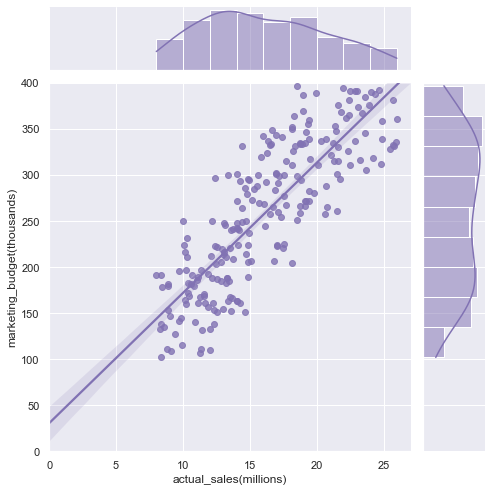

In [102]:
import seaborn as sns
sns.set_theme(style="darkgrid")

g = sns.jointplot(x="actual_sales(millions)", y="marketing_budget(thousands)", data=sales,
                  kind="reg", truncate=False,
                  xlim=(0,27), ylim=(0, 400),
                  color="m", height=7)

### Analizamos la distribucion de los % sobre ventas

Obtenemos que el bugget es en promedio un 16% y que la distribucion se aproxima a una distr. Normal

count    222.000000
mean      16.173423
std        2.971890
min        9.110000
25%       13.955000
50%       16.195000
75%       17.860000
max       24.900000
Name: %_sobre_ventas, dtype: float64


c:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


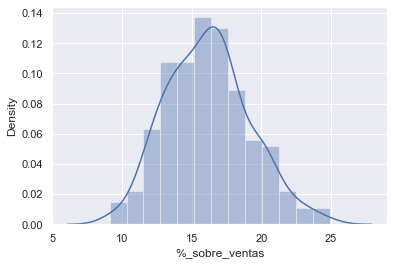

In [103]:
sns.distplot( a=sales['%_sobre_ventas'], hist=True, kde=True, rug=False )

print(sales.describe()['%_sobre_ventas'])

#### Regresion Lineal 
Ahora vamos a intentar pronosticar en funcion de los datos cual sería el presupuesto ideal dado el valor de las ventas actuales

In [104]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [105]:
X = sales['marketing_budget(thousands)'].values.reshape(-1,1)
y = sales['actual_sales(millions)']


model = LinearRegression()

model.fit(X,y)



LinearRegression()

In [106]:
print(f'La función para predecir será: \n {sales.columns[0]} =  {model.coef_.round(2)} * {sales.columns[1]} + {model.intercept_.round(2)}')

La función para predecir será: 
 marketing_budget(thousands) =  [0.05] * actual_sales(millions) + 3.32


'marketing_budget(thousands)'

#### Chequeo con un valor de referencia en el index 22

In [107]:

print(sales[sales.index == 22])

pred = model.coef_.round(2) * 231.65 + model.intercept_.round(2)

print(f' La prediccion de ventas para el index 22 es de {pred}')

    marketing_budget(thousands)  actual_sales(millions)  %_sobre_ventas
22                       213.65                   13.06           16.36
 La prediccion de ventas para el index 22 es de [14.9025]


In [114]:
from sklearn.metrics import r2_score

y_true = sales['actual_sales(millions)']
y_pred = model.predict(X)

R2 = r2_score(y_true, y_pred).round(4)

R2

print(f'El modelo tiene un ajuste de :{R2}')

El modelo tiene un ajuste de :0.7001


### Creamos Regresion Lineal para ver como es nuestra preformance en datos desconocidos. Separamos en train - test

Obtenermos que los resultados en test son levememente menores a los de train. 'R2 = 0.63'



In [122]:
X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.33, random_state=42, shuffle=False)

model_2 = LinearRegression()

model_2.fit(X_train,y_train)

pred_2 = model_2.predict(X_test)

df_pred = pd.DataFrame()

#Agrego las columnas
df_pred["Ventas_Reales"] = pd.Series(y_train)
df_pred["Prediccion"] = pd.Series(pred_2)



In [110]:
from sklearn.metrics import mean_absolute_error , mean_squared_error

R2_2 = r2_score(y_test, pred_2).round(4)
MSE = mean_squared_error(y_test, pred_2)
MAE = mean_absolute_error(y_test, pred_2)
RMSE = np.sqrt(MSE)

# Computo los errores que puedo tener en la prediccion del Budget de Marketing en función de las Ventas
print(f'El Error medio absoluto es : {MAE.round(2)}')
print(f'El Error cuadratico medio (MSE) es : {MSE.round(2)}')
print(f'El Error medio (RMSE) es : {RMSE.round(2)}')
print(f'El R2 es : {R2_2}')

El Error medio absoluto es : 2.05
El Error cuadratico medio (MSE) es : 6.71
El Error medio (RMSE) es : 2.59
El R2 es : 0.6629


#### Graficamos las ventas reales vs las predicciones

Notamos que nuestro modelo tiende a sobre-estimar los ingresos futuros ya que la mayoria de los puntos se encuentran por encima de nuestyra recta de Regresión

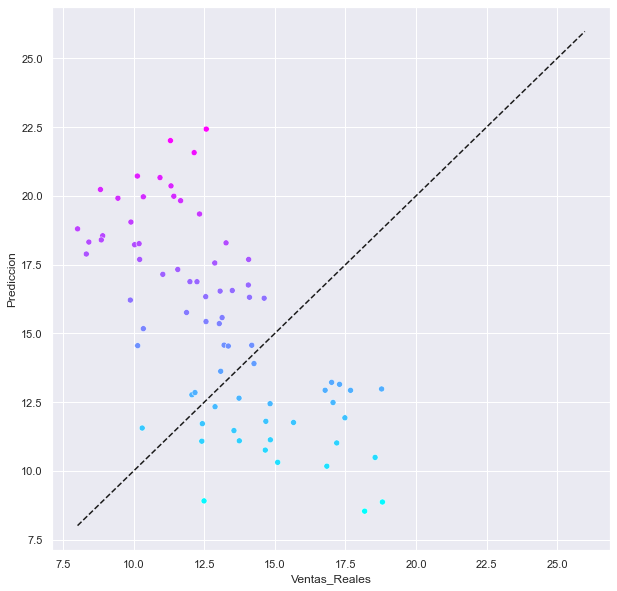

In [123]:
#Graficamos
fig = plt.figure(figsize=(10,10))

axes = sns.scatterplot(data=df_pred,x="Ventas_Reales",y="Prediccion",hue="Prediccion",palette="cool",legend=False)

start = min(y_train.min(),pred_2.min())
end   = max(y_train.max(),pred_2.max())

line= plt.plot([start,end],[start,end],"k--")

##### Evaluamos regularizar nuestro modelo con Lasso, Ridge y Elastic Nets.

Vemos que dado que tenemos una variable para predecir , los valores de las regularizaciones son similares a la Regresion Lineal sin clasificar.

In [52]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge,Lasso,ElasticNet

estimadores = {'Reglin':LinearRegression(),'ElasticsNet': ElasticNet(),'Lasso':Lasso(),'Ridge':Ridge()}

for nom_est,obj_est in estimadores.items():
    kfold = KFold(n_splits = 10, random_state = 11 , shuffle=True)
    puntuacion = cross_val_score(estimator = obj_est , X = X , y= y , cv=kfold , scoring ='r2' )
    print(f'{nom_est:>16}:'+ f' Promedio Puntajes R2 = {puntuacion.mean():.2%}')

          Reglin: Promedio Puntajes R2 = 67.20%
     ElasticsNet: Promedio Puntajes R2 = 67.23%
           Lasso: Promedio Puntajes R2 = 67.21%
           Ridge: Promedio Puntajes R2 = 67.20%
